In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox

In [6]:
world_population = pd.read_csv("C:/Users/PetuMyles/Downloads/world_population.csv")

In [35]:
world_population.head(15)

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,41128771.0,38972230,33753499.0,28189672.0,19542982.0,1.069480e+07,12486631,10752971,652230.000,63.058700,1.0257,0.52
1,138,2842321.0,2866849,2882481.0,2913399.0,3182021.0,3.295066e+06,2941651,2324731,28748.000,98.870200,0.9957,0.04
2,34,44903225.0,43451666,39543154.0,35856344.0,30774621.0,2.551807e+07,18739378,13795915,1072089.375,18.853100,1.0164,0.56
3,213,44273.0,46189,51368.0,54849.0,58230.0,4.781800e+04,32886,27075,199.000,222.477400,0.9831,0.00
4,203,79824.0,77700,71746.0,71519.0,66097.0,5.356900e+04,35611,19860,468.000,170.564100,1.0100,0.00
5,42,35588987.0,33428485,28127721.0,23364185.0,16394062.0,1.182864e+07,8330047,6029700,1072089.375,28.546600,1.0315,0.45
6,224,15857.0,15585,14525.0,13172.0,11047.0,8.316000e+03,6560,6283,91.000,174.252700,1.0066,0.00
7,201,93763.0,92664,89941.0,85695.0,75055.0,6.332800e+04,64888,64516,442.000,212.133500,1.0058,0.00
8,33,45510318.0,45036032,43257065.0,41100123.0,37070774.0,2.927690e+07,24220713,21809327,1072089.375,16.368300,1.0052,0.57
9,140,2780469.0,2805608,2878595.0,2946293.0,3168523.0,3.556539e+06,3135123,2534377,29743.000,93.483100,0.9962,0.03


In [38]:
world_population.shape

(234, 13)

In [56]:
world_population.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, 0 to 147
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         91 non-null     float64
 1   2022 Population              91 non-null     float64
 2   2020 Population              91 non-null     float64
 3   2015 Population              91 non-null     float64
 4   2010 Population              91 non-null     float64
 5   2000 Population              91 non-null     float64
 6   1990 Population              91 non-null     float64
 7   1980 Population              91 non-null     float64
 8   1970 Population              91 non-null     float64
 9   Area (km²)                   90 non-null     float64
 10  Density (per km²)            89 non-null     float64
 11  Growth Rate                  68 non-null     float64
 12  World Population Percentage  55 non-null     float64
dtypes: float64(13)
memory usag

## Detecting outliers

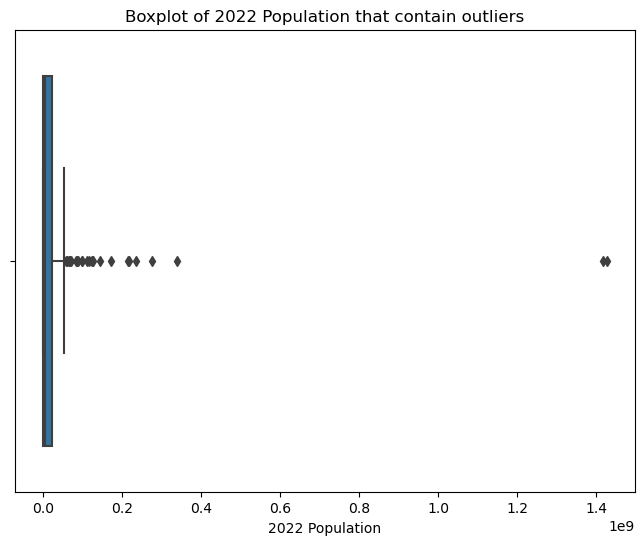

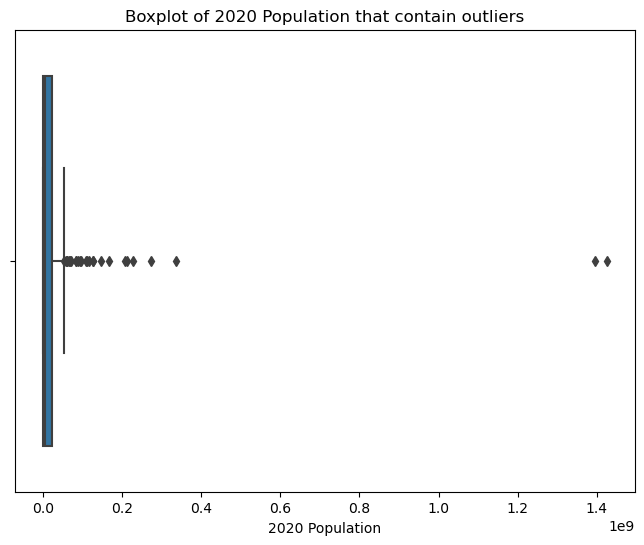

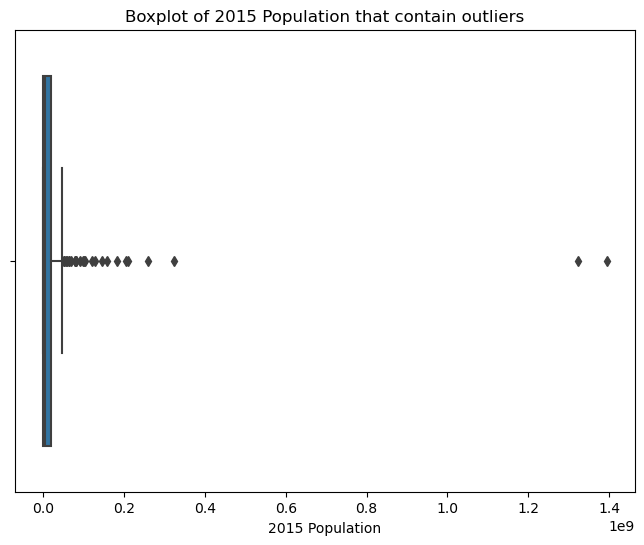

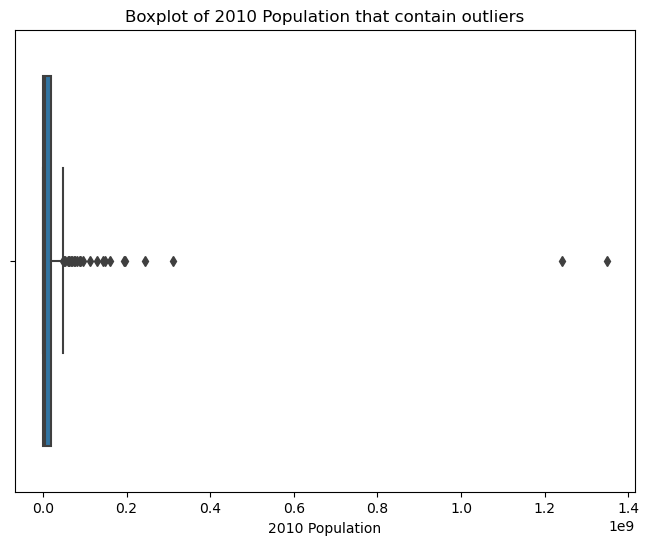

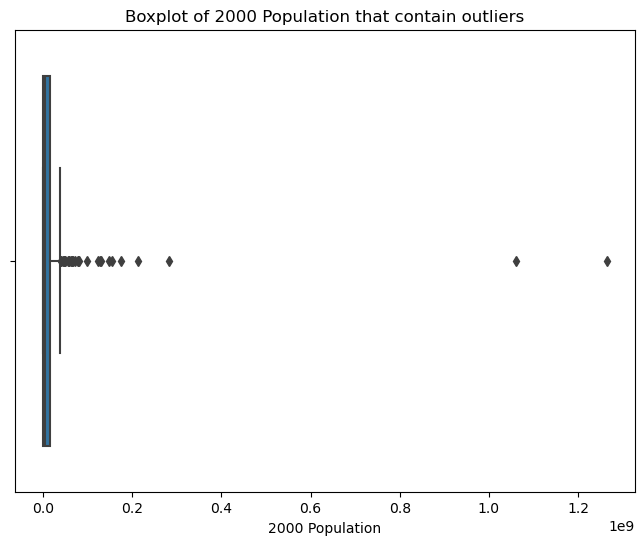

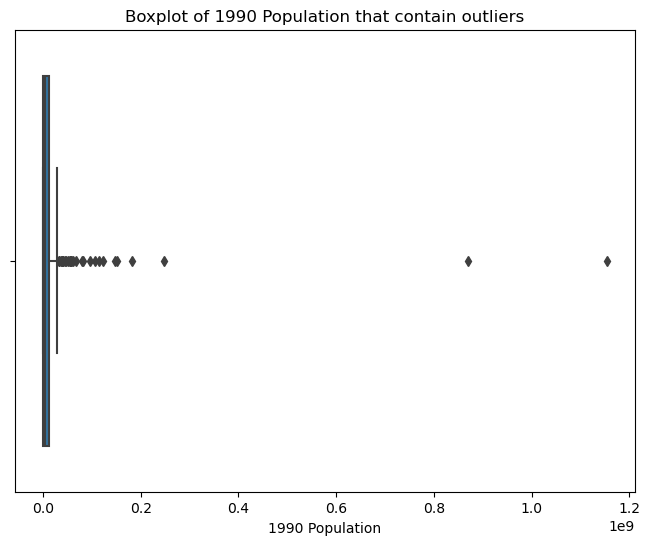

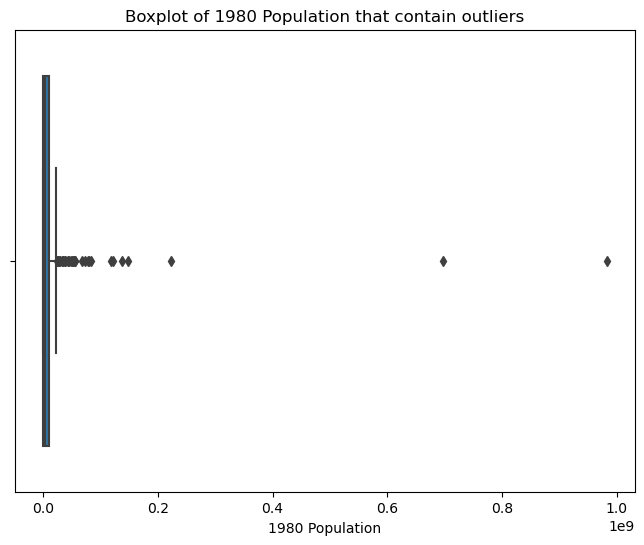

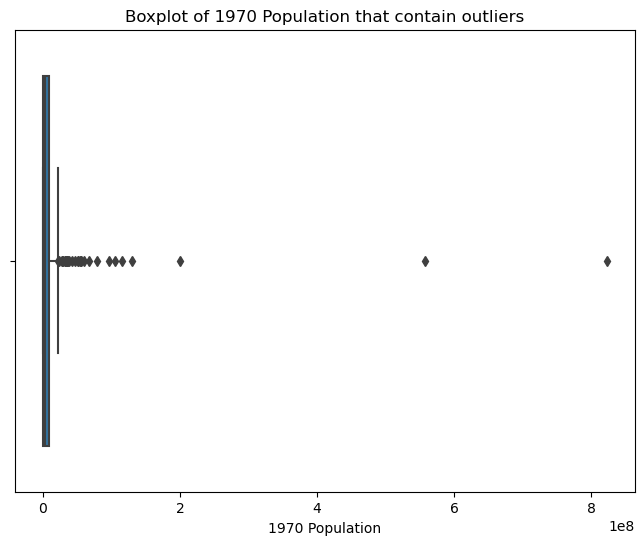

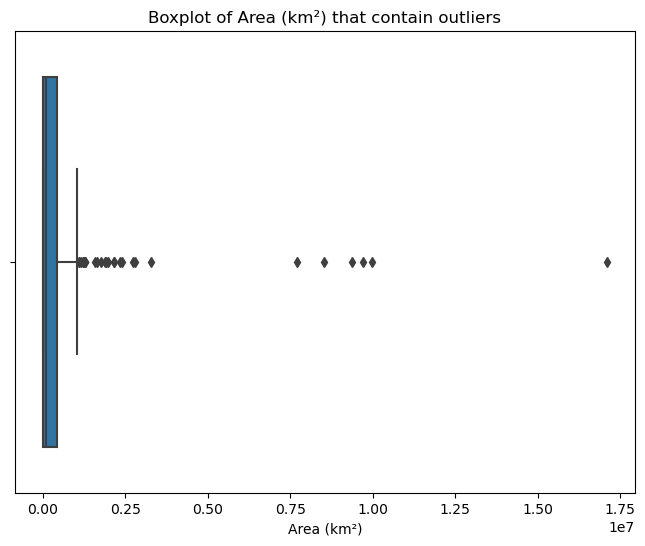

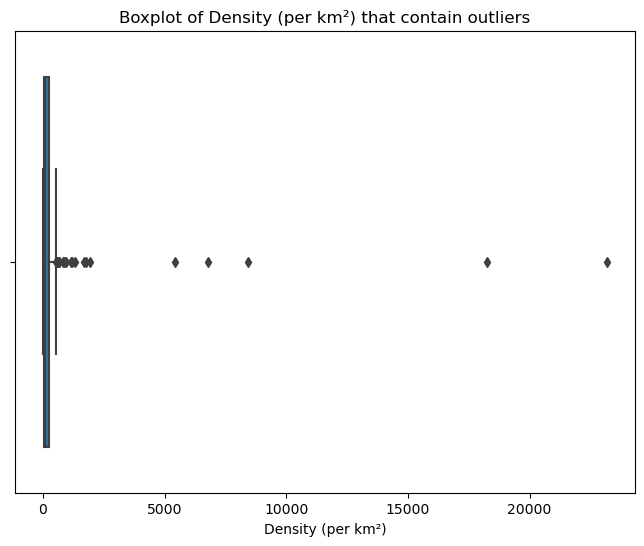

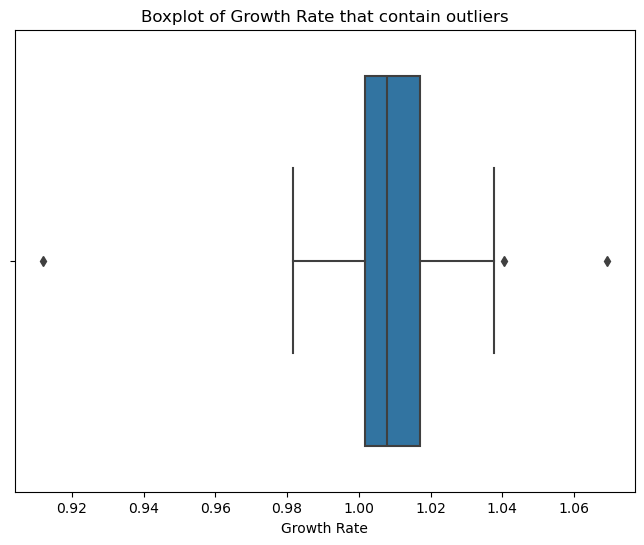

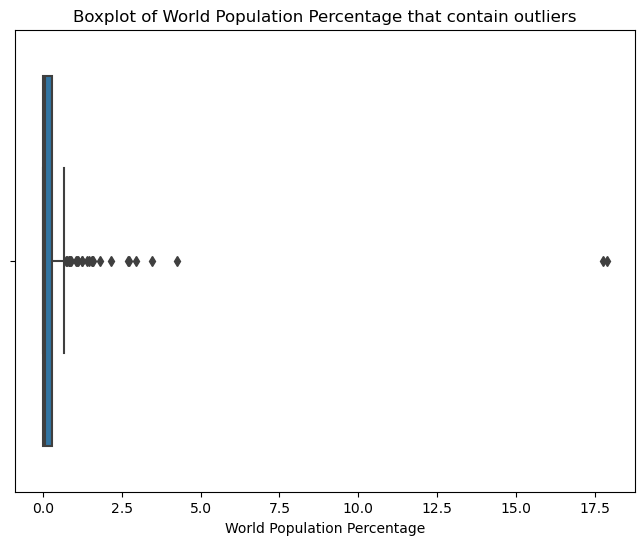

In [13]:
# Function to detect outlier in the columns of the dataset using the IQR method
def detect_outliers(world_population , column):
    q1 = world_population [column].quantile(0.25)
    q3 = world_population [column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = world_population[(world_population[column] < lower_bound) | (world_population[column] > upper_bound)].index
    return outliers
    
# List to store columns with outliers
columns_with_outliers = []

# Detect outliers in the numerical columns of the dataset
for col in world_population.select_dtypes(include=['float64', 'int64']).columns:
    outliers = detect_outliers(world_population, col)
    if len(outliers) > 0:
        columns_with_outliers.append(col)
        
        # Plot boxplots for the columns with outliers
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=world_population[col])
        plt.title(f'Boxplot of {col} that contain outliers')
        plt.show()

In [14]:
world_population.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,117.500000,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


## Handling Outliers

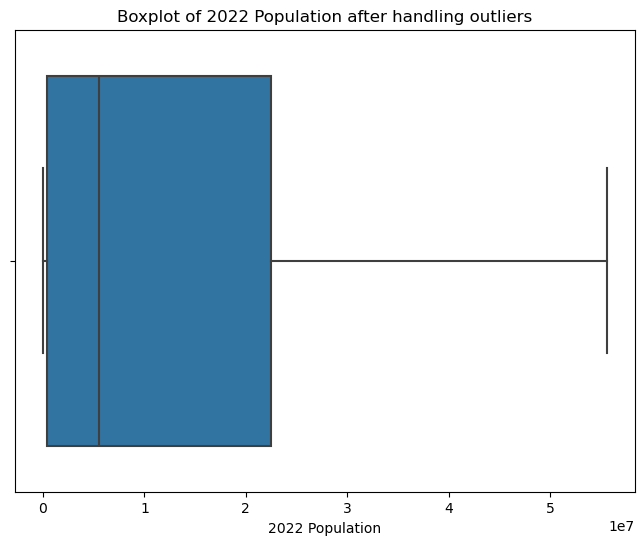

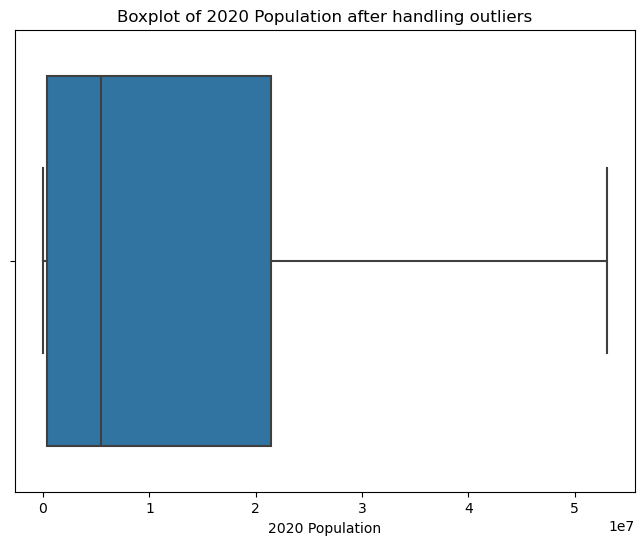

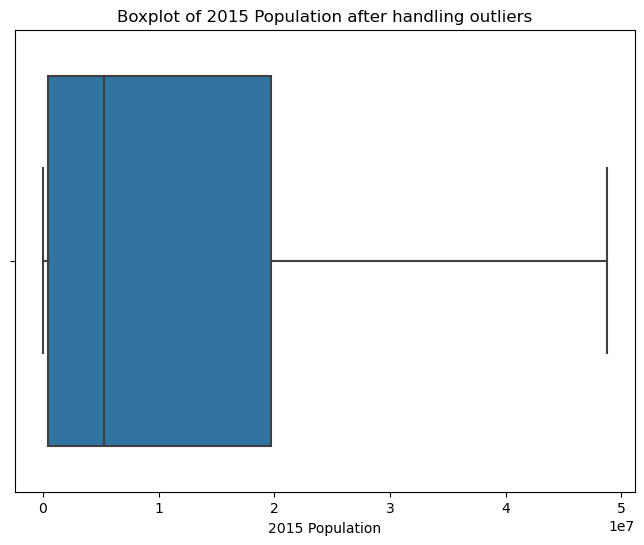

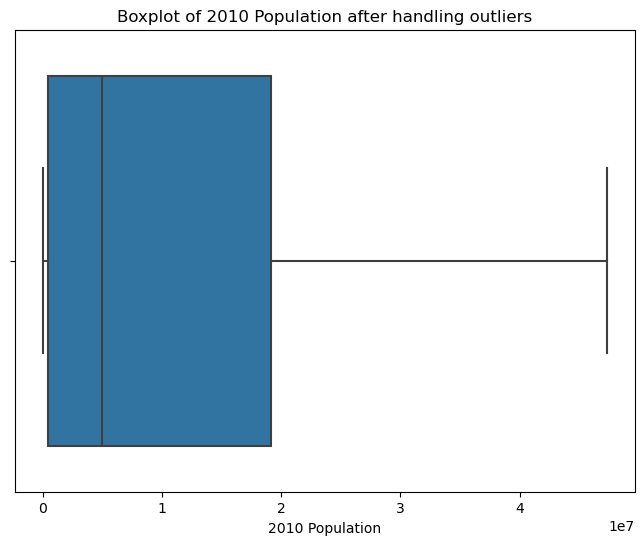

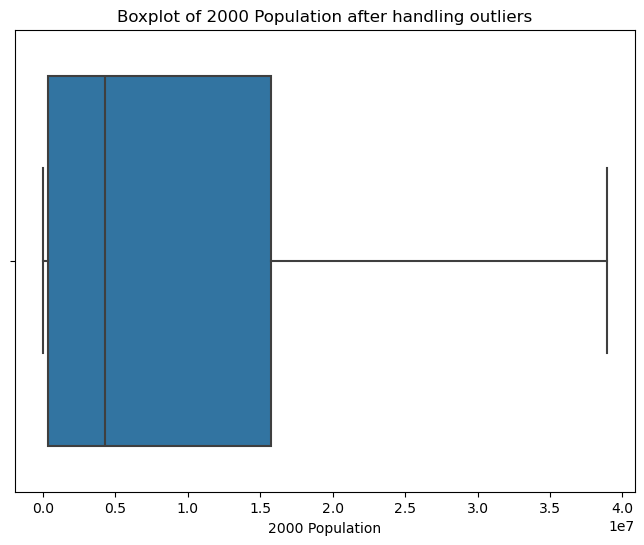

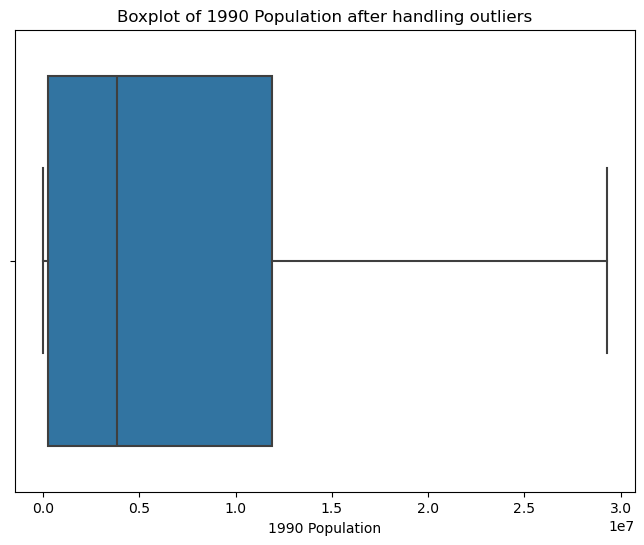

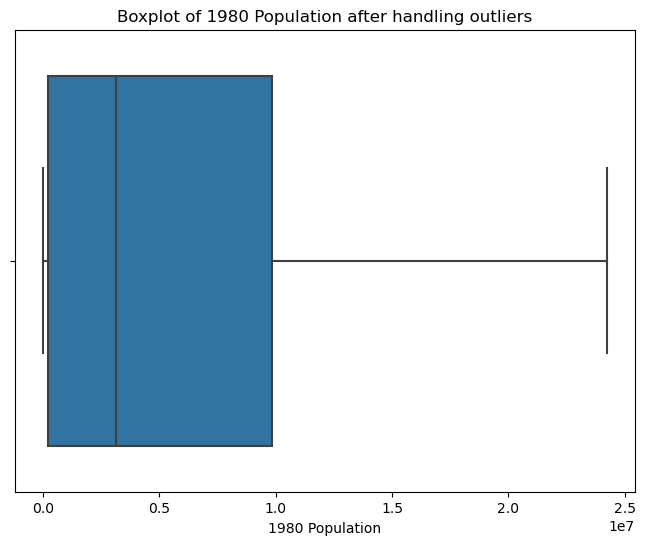

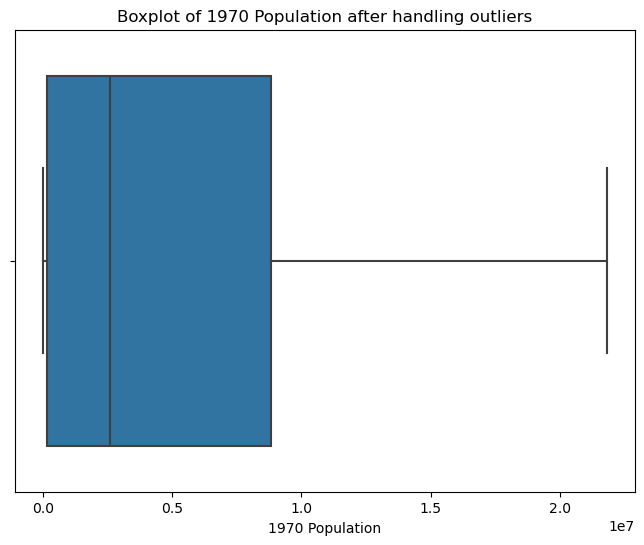

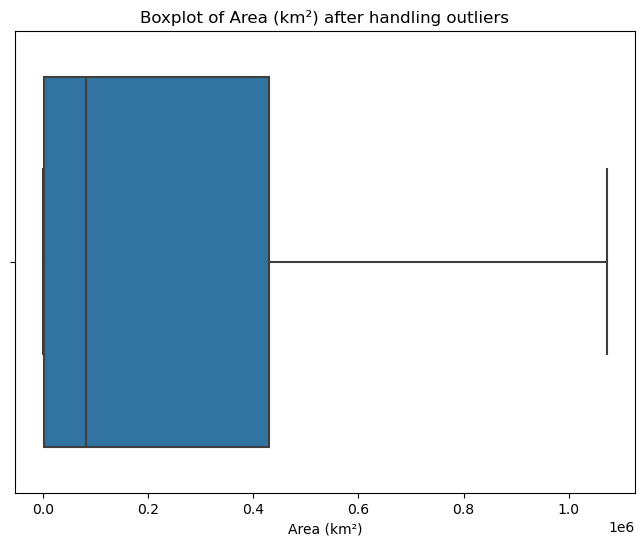

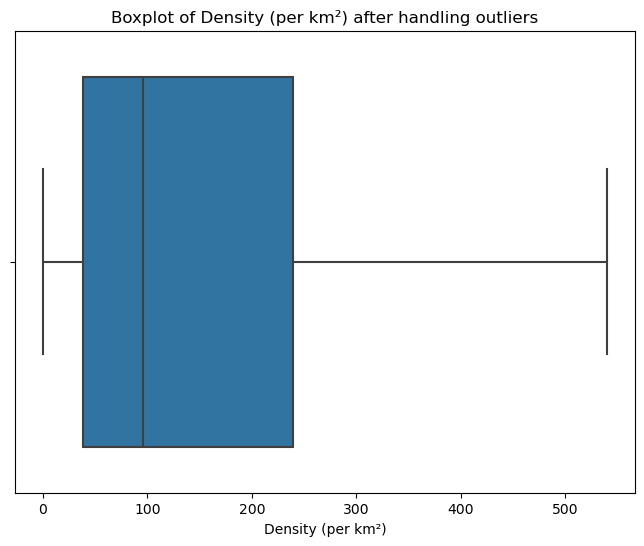

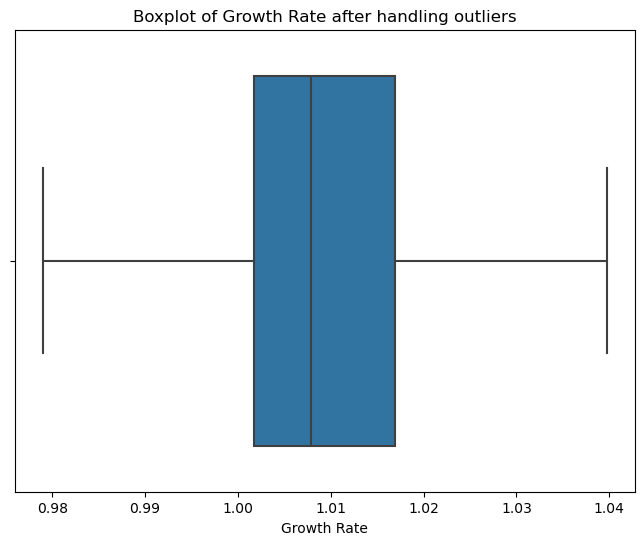

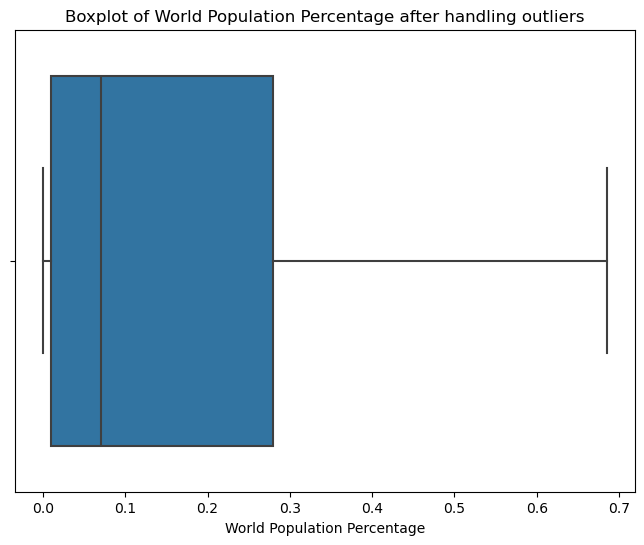

In [17]:
def detect_outliers(world_population, column):
    q1 = world_population[column].quantile(0.25)
    q3 = world_population[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = world_population[(world_population[column] < lower_bound) | (world_population[column] > upper_bound)].index
    return outliers
    
# Function to handle outliers in the dataset using the IQR method by capping and flooring
def handle_outliers(world_population, column):
    q1 = world_population[column].quantile(0.25)
    q3 = world_population[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    world_population[column] = world_population[column].clip(lower=lower_bound, upper=upper_bound)
    return world_population

columns_with_outliers = []    

for col in world_population.select_dtypes(include=['float64', 'int64']).columns:
    outliers = detect_outliers(world_population, col)
    if len(outliers) > 0:
        columns_with_outliers.append(col)
        outlier_handled = handle_outliers(world_population, col)

# Plot boxplots for the handled outliers
for col in columns_with_outliers:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=world_population[col])
    plt.title(f'Boxplot of {col} after handling outliers')
    plt.show()

In [90]:
world_population .describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,117.500000,1.485435e+07,1.434831e+07,1.325587e+07,1.251144e+07,1.043102e+07,8.303216e+06,6.843893e+06,5.840868e+06,2.746004e+05,165.967140,1.009735,0.184808
std,67.694165,1.903058e+07,1.827776e+07,1.680888e+07,1.610291e+07,1.332163e+07,1.018616e+07,8.398356e+06,7.407402e+06,3.713518e+05,170.716019,0.011436,0.236160
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.979013,0.000000
25%,59.250000,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000
max,234.000000,5.556165e+07,5.299702e+07,4.872012e+07,4.730920e+07,3.891489e+07,2.927690e+07,2.422071e+07,2.180933e+07,1.072089e+06,539.706312,1.039712,0.685000


## Detecting missing values 

In [57]:
world_population.isna().sum()

Rank                            1
2022 Population                 1
2020 Population                 1
2015 Population                 1
2010 Population                 1
2000 Population                 1
1990 Population                 1
1980 Population                 1
1970 Population                 1
Area (km²)                      2
Density (per km²)               3
Growth Rate                    24
World Population Percentage    37
dtype: int64

according to the analysis performed we can see that there are a missing values within the data set 

In [58]:
## missing values for numerical and categorical columns in df1(test)
for col in world_population.columns:
    if pd.api.types.is_numeric_dtype(world_population[col]):
        world_population[col].fillna(world_population[col].mean(),inplace=True)
    else:
        world_population[col].fillna(world_population[col].mode()[0],inplace=True)

In [60]:
world_population.head(100)

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,10.691968,279.775767,282.729505,275.793414,247.896764,231.690332,235.591719,232.798434,190.142030,59.697268,4.373741,-1.377220,-1.050892
2,11.886887,270.831298,273.073656,264.559159,237.673642,222.653277,241.335106,211.542076,166.934786,65.888348,3.088351,-1.420796,-1.527511
5,20.814371,198.074946,201.923026,201.735696,188.455970,189.161422,217.613693,206.649536,175.173125,39.122711,5.322382,-1.404336,-1.389122
8,27.416706,130.507350,132.866311,130.848054,120.780593,107.648528,112.498650,98.930569,77.533936,12.490342,8.857467,-1.398520,-1.876173
11,29.864911,96.041602,96.885616,94.962527,88.153868,82.909300,86.440633,78.551632,66.859672,29.456410,2.383577,-1.425910,-1.320832
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,30.276361,91.170859,91.461846,89.020377,82.549062,78.482359,82.311506,74.531412,61.661499,25.473410,7.433935,-1.407125,-1.435056
143,34.662252,38.864472,39.326107,39.793804,39.231326,40.707879,43.155358,39.904612,34.705465,49.791398,2.981403,-1.407125,-1.435056
144,12.642269,267.524845,270.925893,265.389584,240.754378,229.191895,248.519692,216.607610,171.773943,61.426197,5.187366,-1.407125,-1.435056
146,17.287770,227.138215,229.832402,226.046353,207.688037,206.770797,232.465054,203.329733,161.459791,42.721505,5.187366,-1.407125,-1.435056


## Bivariate Analysis

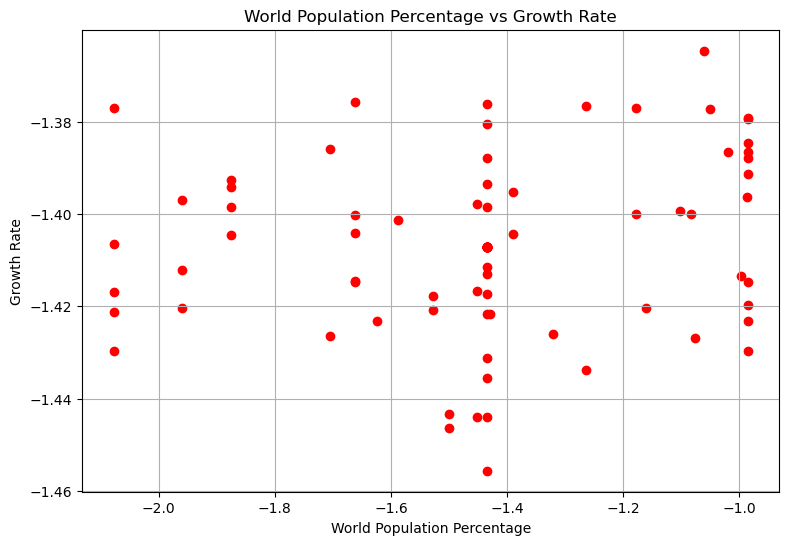

In [61]:
plt.figure(figsize=(9, 6))
plt.scatter(world_population ["World Population Percentage"], world_population ["Growth Rate"], color="red")
plt.title("World Population Percentage vs Growth Rate")
plt.xlabel("World Population Percentage")
plt.ylabel("Growth Rate")
plt.grid(True)
plt.show()

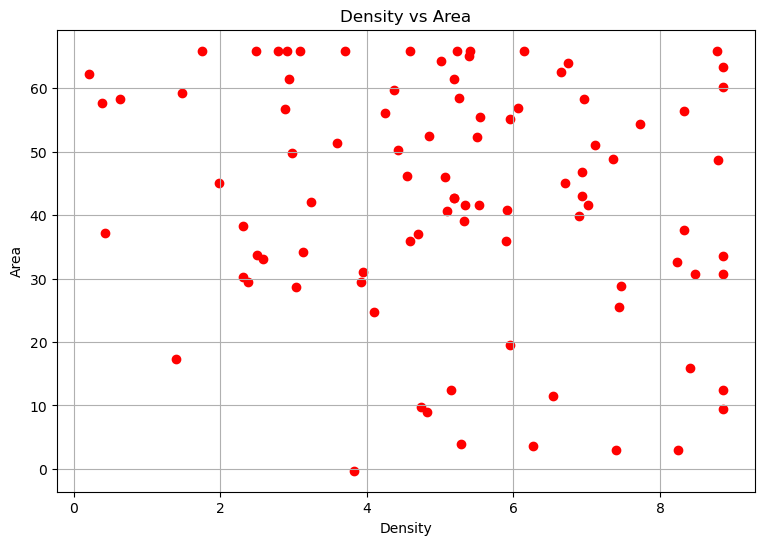

In [62]:
plt.figure(figsize=(9, 6))
plt.scatter(world_population ["Density (per km²)"], world_population ["Area (km²)"], color="red")
plt.title("Density vs Area")
plt.xlabel("Density")
plt.ylabel("Area")
plt.grid(True)
plt.show()

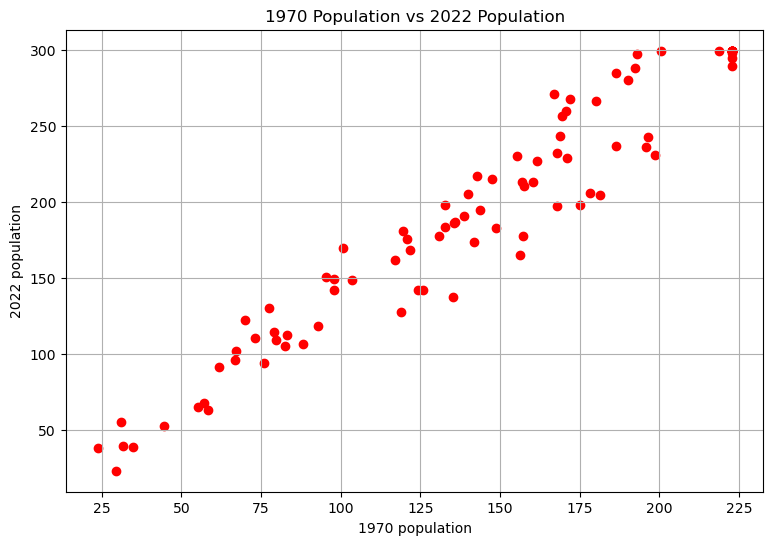

In [63]:
plt.figure(figsize=(9, 6))
plt.scatter(world_population["1970 Population"], world_population["2022 Population"], color="red")
plt.title("1970 Population vs 2022 Population")
plt.xlabel("1970 population")
plt.ylabel("2022 population")
plt.grid(True)
plt.show()

## Handling Skewed Data

C:\Users\PetuMyles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


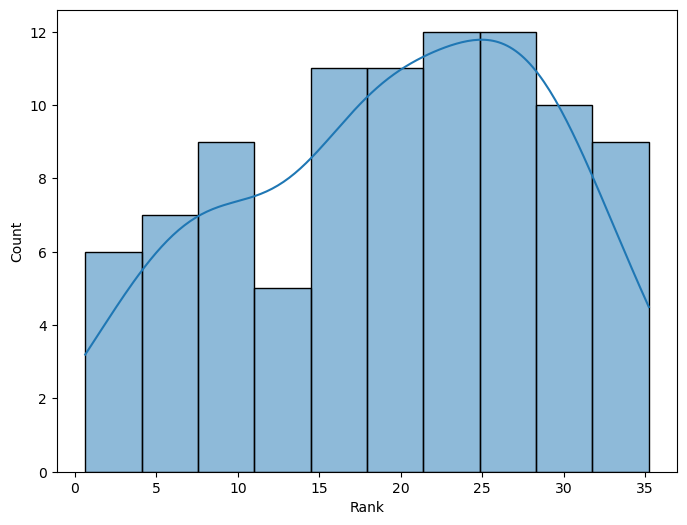

C:\Users\PetuMyles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


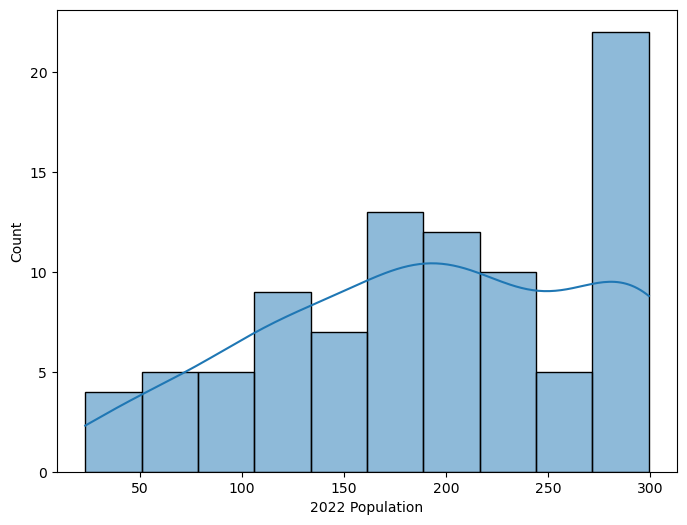

C:\Users\PetuMyles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


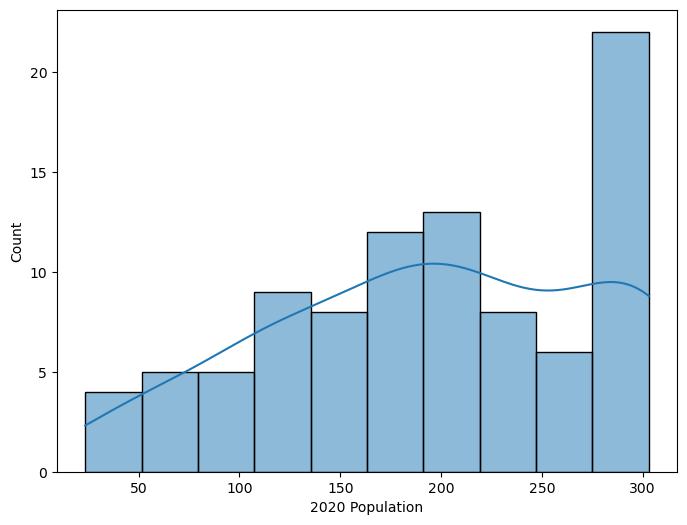

C:\Users\PetuMyles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


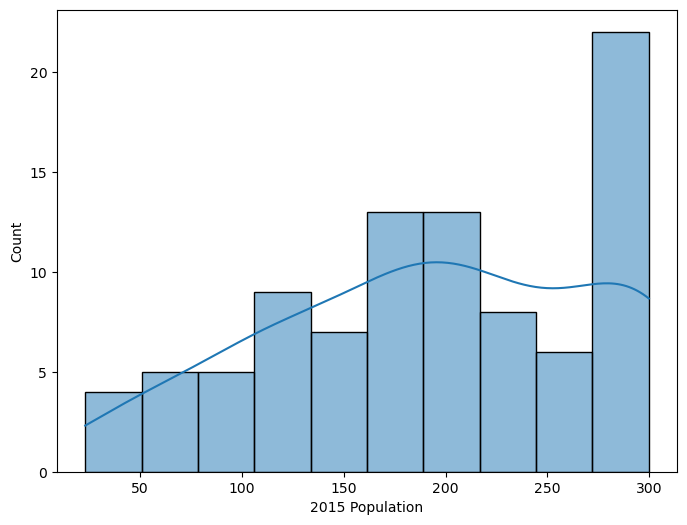

C:\Users\PetuMyles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


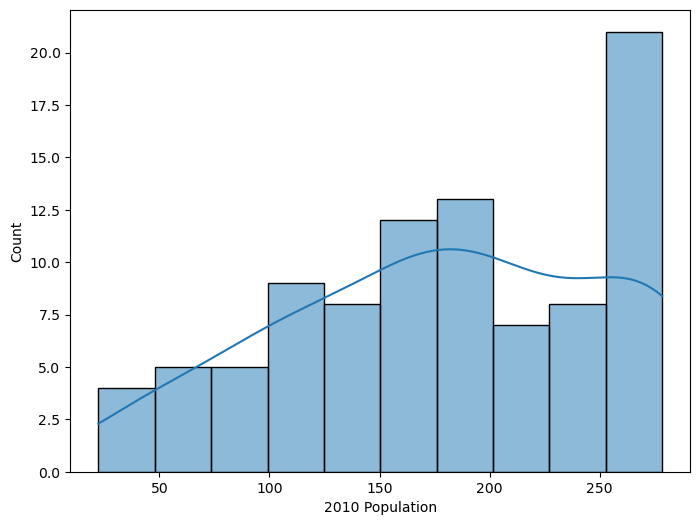

C:\Users\PetuMyles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


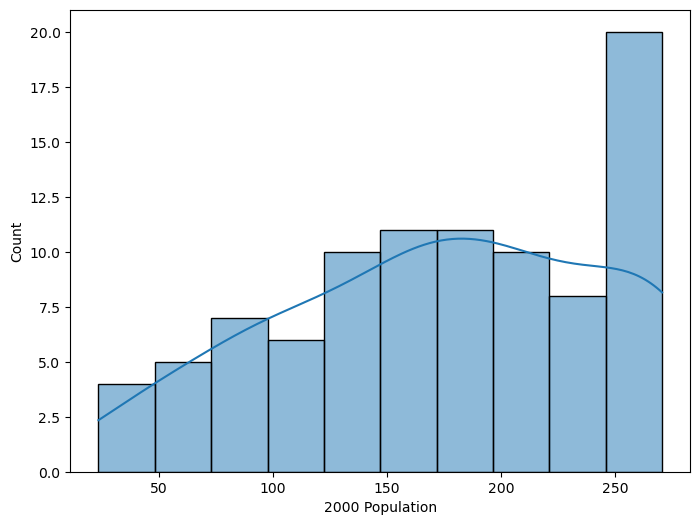

C:\Users\PetuMyles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


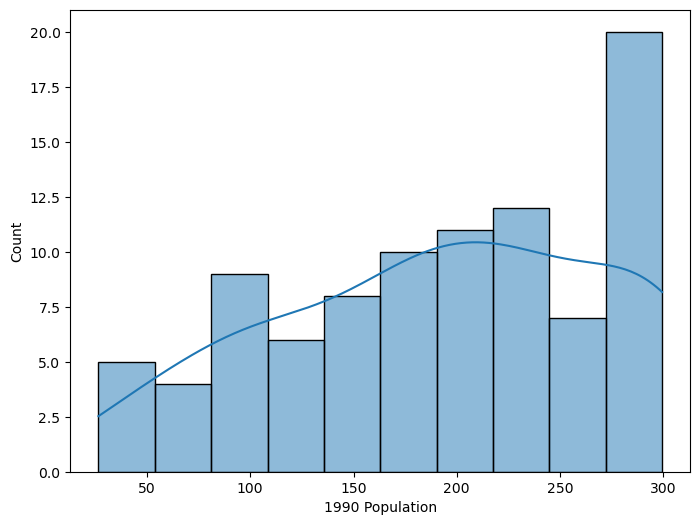

C:\Users\PetuMyles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


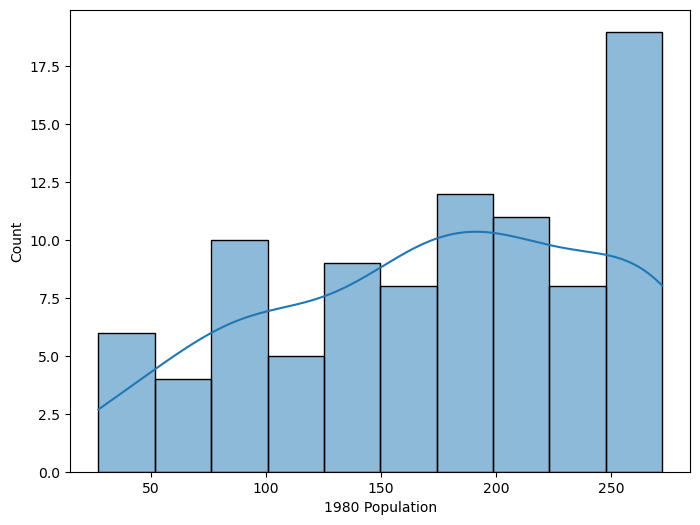

C:\Users\PetuMyles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


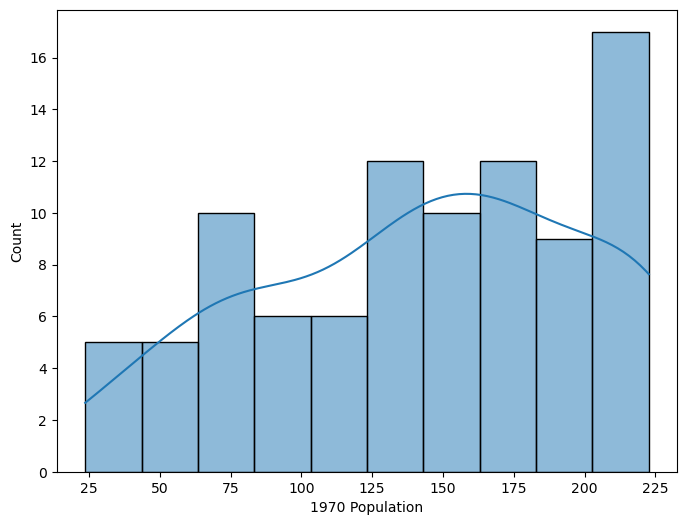

C:\Users\PetuMyles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


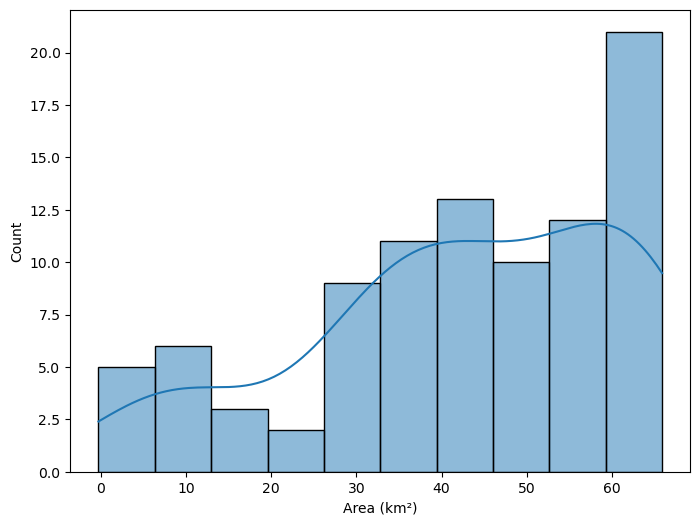

C:\Users\PetuMyles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


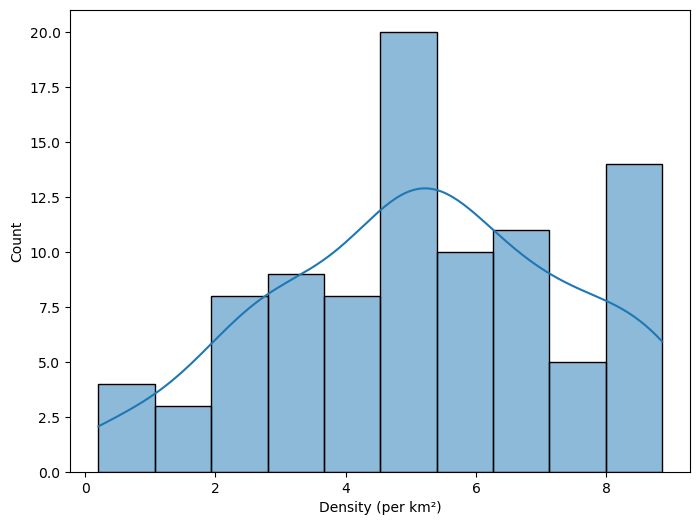

C:\Users\PetuMyles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


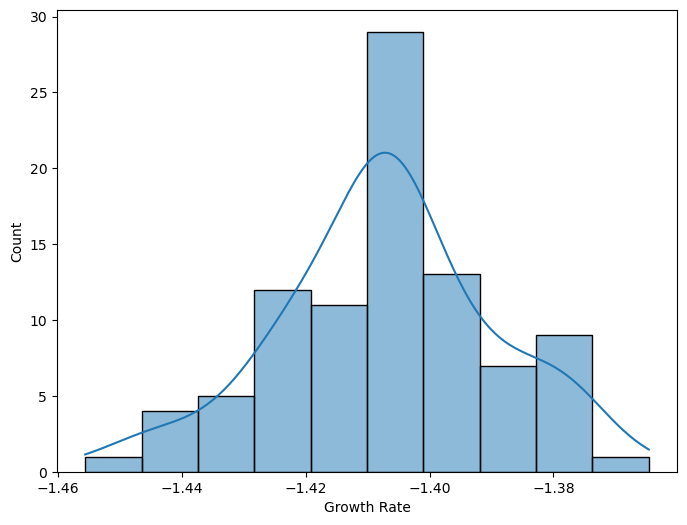

C:\Users\PetuMyles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


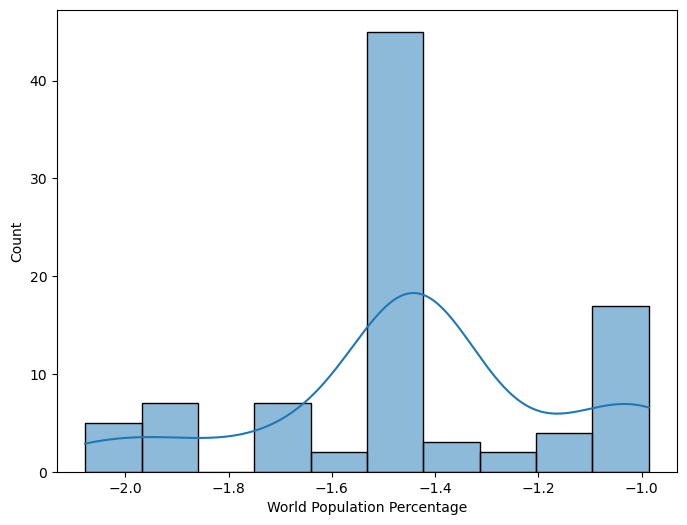

In [64]:
for col in world_population .select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(world_population [col], bins=10, kde=True)
    plt.xlabel(col)
    plt.show()

C:\Users\PetuMyles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


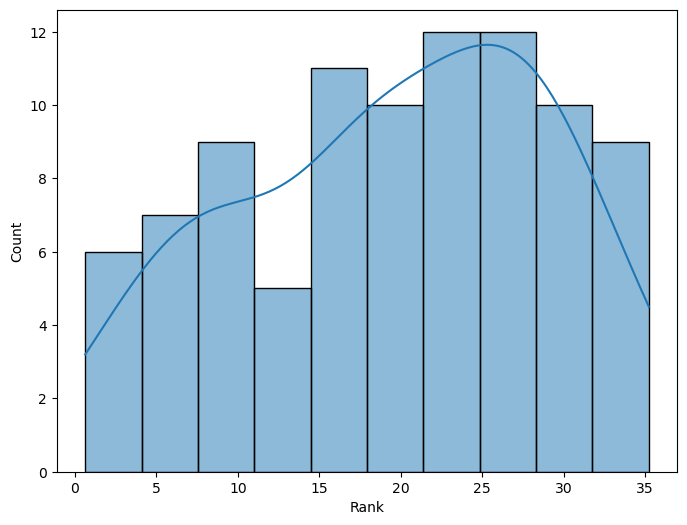

C:\Users\PetuMyles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


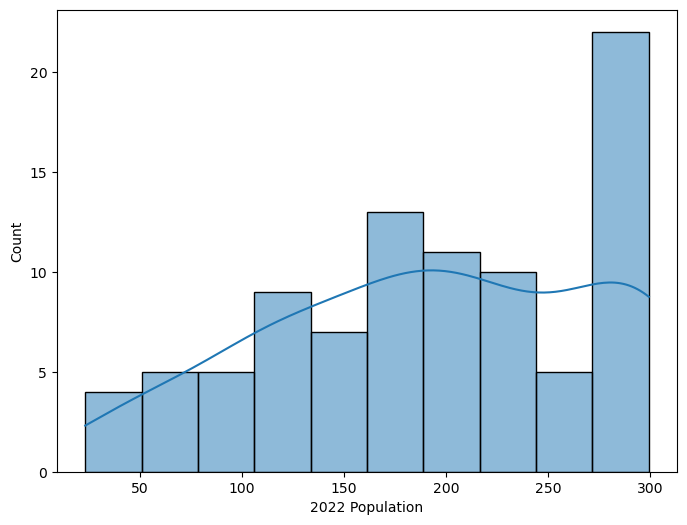

C:\Users\PetuMyles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


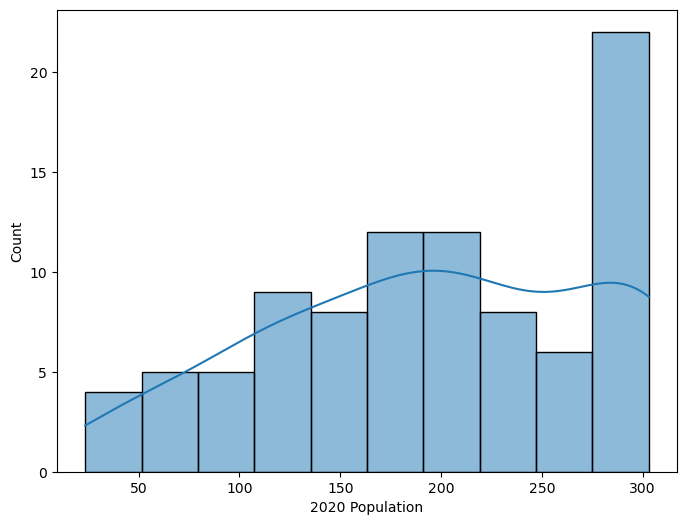

C:\Users\PetuMyles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


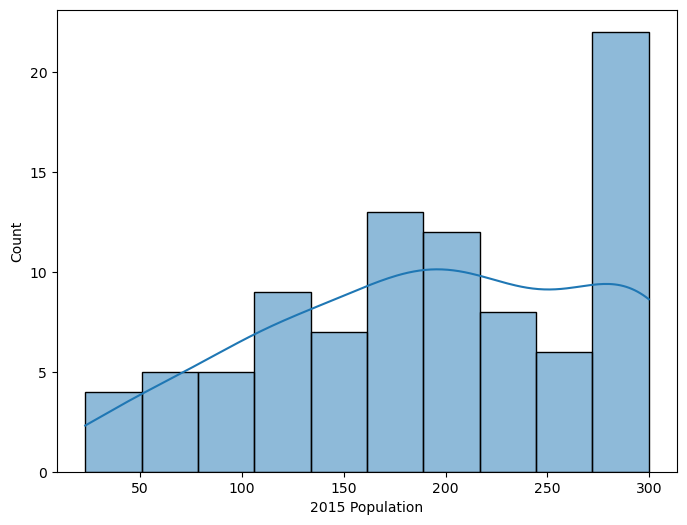

C:\Users\PetuMyles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


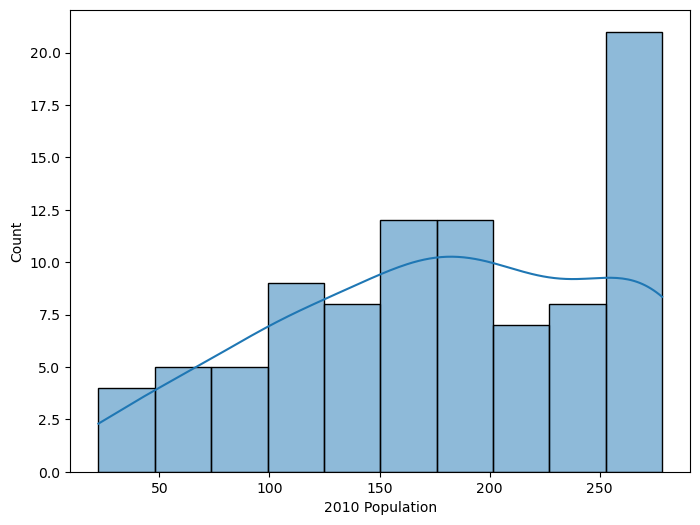

C:\Users\PetuMyles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


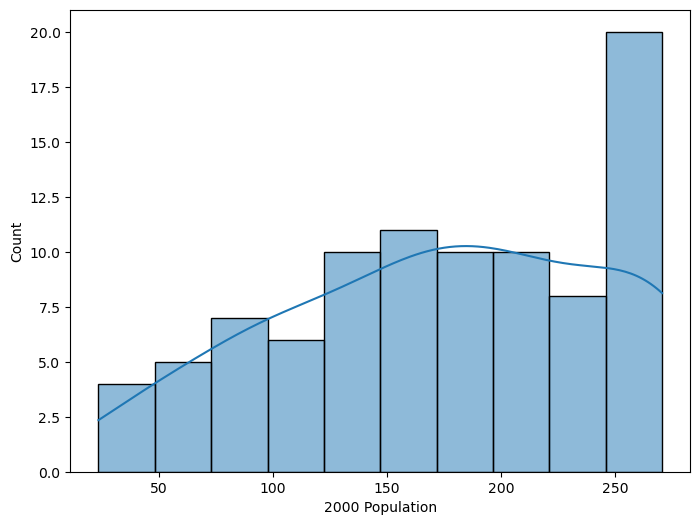

C:\Users\PetuMyles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


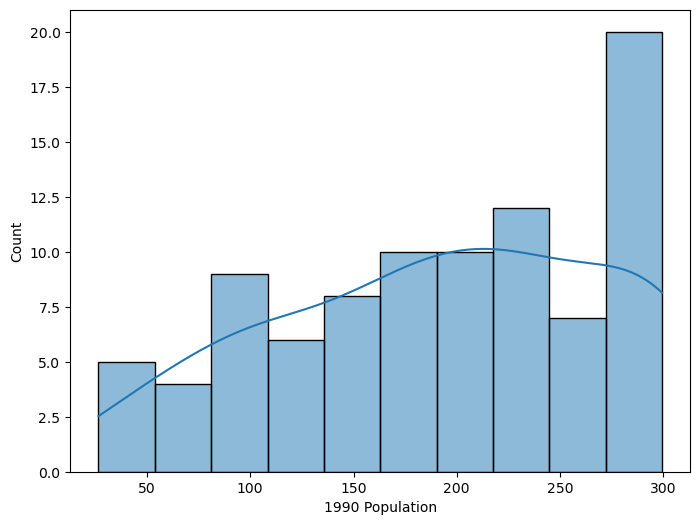

C:\Users\PetuMyles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


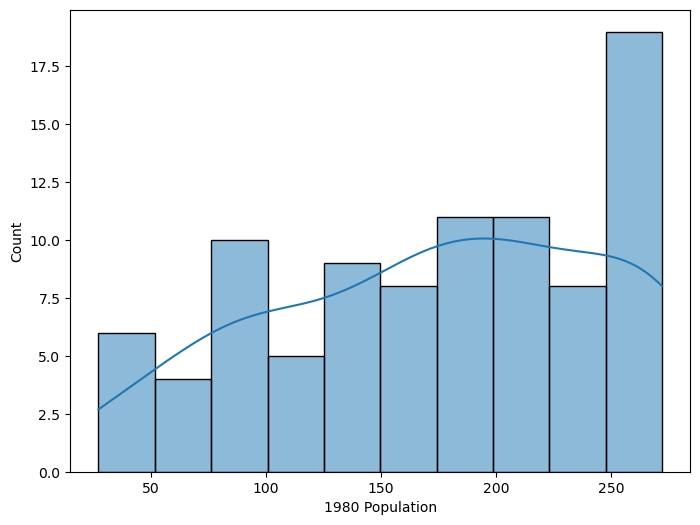

C:\Users\PetuMyles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


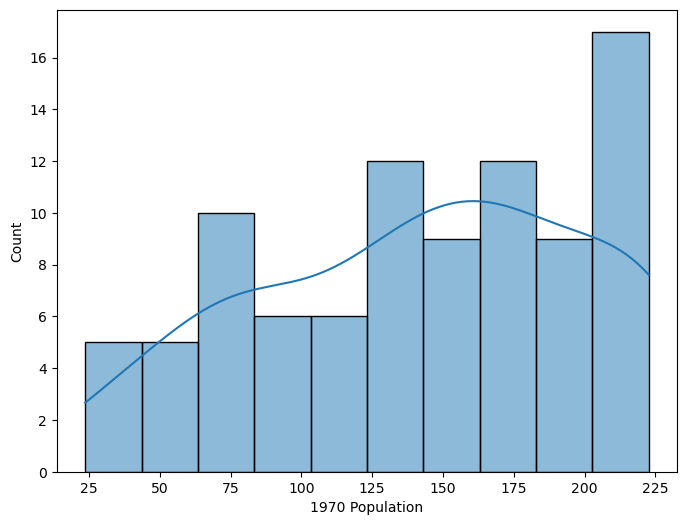

C:\Users\PetuMyles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


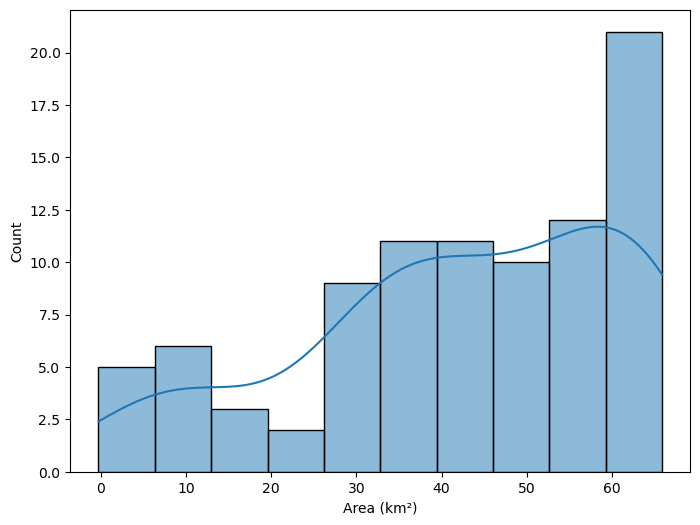

C:\Users\PetuMyles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


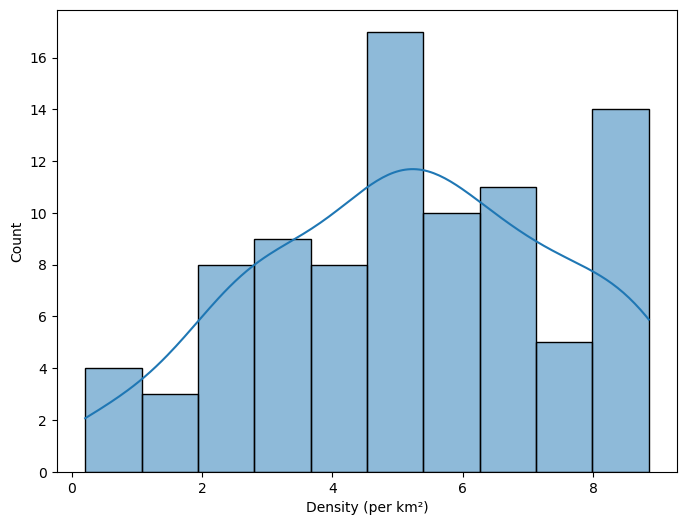

C:\Users\PetuMyles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


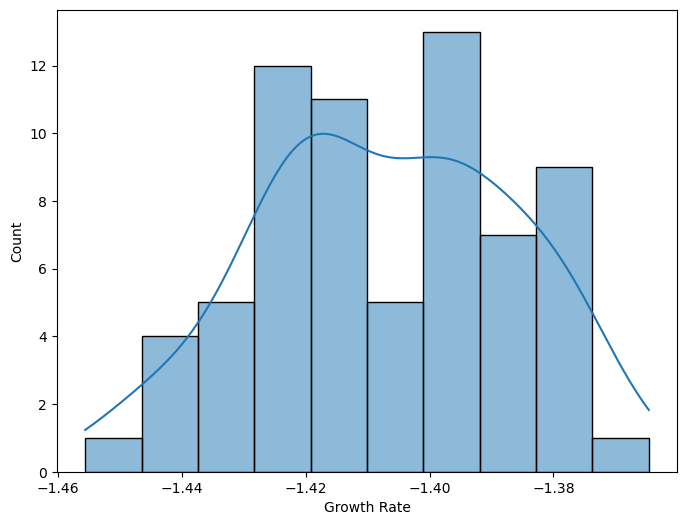

C:\Users\PetuMyles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


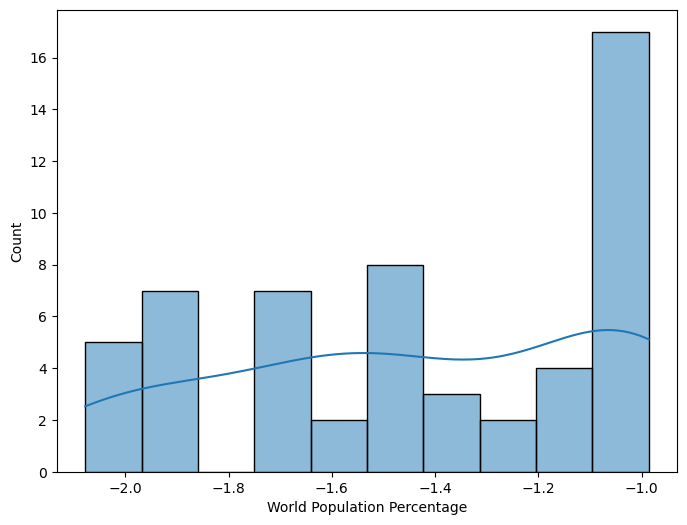

In [42]:
for col in world_population .select_dtypes(include=['float64', 'int64']).columns:
    world_population = world_population[world_population[col] > 0]
    world_population [col] = pd.Series(boxcox(world_population [col] )[0].tolist())
    plt.figure(figsize=(8, 6))
    sns.histplot(world_population [col], bins=10, kde=True)
    plt.xlabel(col)
    plt.show()

## Correlation

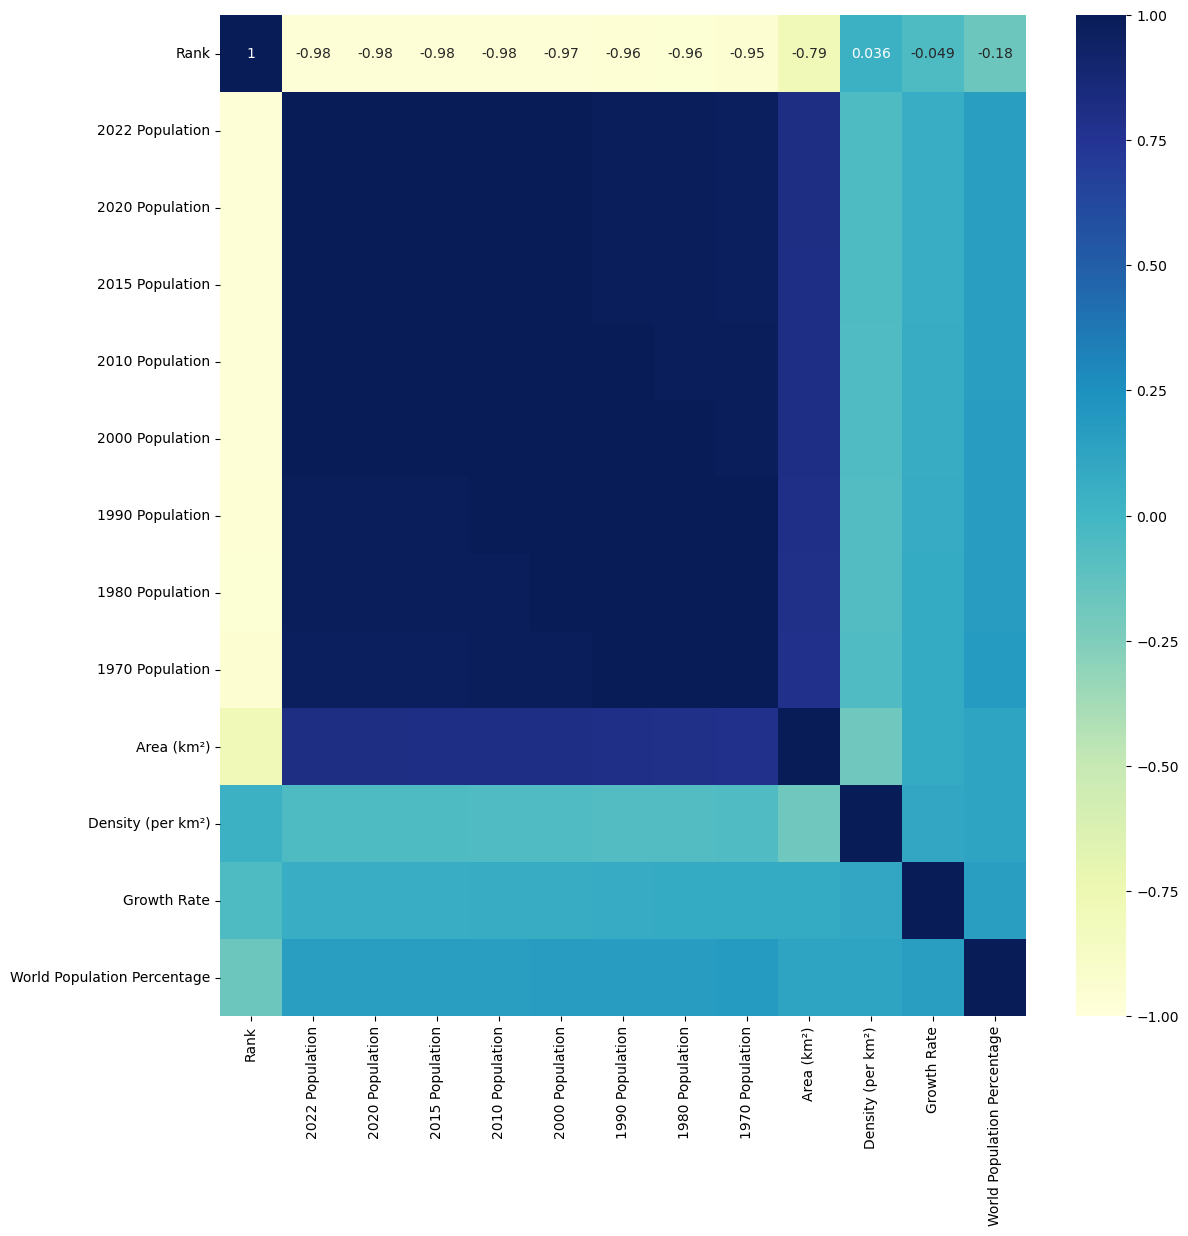

In [65]:
world_population = world_population .select_dtypes(include=['float64', 'int64'])
correlation_matrix = world_population.corr()
#print(correlation_matrix)
plt.figure(figsize=(13, 13))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", vmin=-1, vmax=1)
plt.show()

## Regression

In [73]:
world_population.head(15)

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,10.691968,279.775767,282.729505,275.793414,247.896764,231.690332,235.591719,232.798434,190.142030,59.697268,4.373741,-1.377220,-1.050892
2,11.886887,270.831298,273.073656,264.559159,237.673642,222.653277,241.335106,211.542076,166.934786,65.888348,3.088351,-1.420796,-1.527511
5,20.814371,198.074946,201.923026,201.735696,188.455970,189.161422,217.613693,206.649536,175.173125,39.122711,5.322382,-1.404336,-1.389122
8,27.416706,130.507350,132.866311,130.848054,120.780593,107.648528,112.498650,98.930569,77.533936,12.490342,8.857467,-1.398520,-1.876173
11,29.864911,96.041602,96.885616,94.962527,88.153868,82.909300,86.440633,78.551632,66.859672,29.456410,2.383577,-1.425910,-1.320832
12,17.735668,217.026707,218.822162,212.992121,193.739407,183.402591,197.518046,175.843169,142.721612,41.646226,5.525282,-1.420397,-1.160929
13,28.605898,112.413515,113.884522,113.207408,106.300428,102.836457,114.664785,102.326782,83.216228,33.030642,2.589108,-1.376979,-2.077562
14,18.176068,212.713388,215.956373,213.694999,197.246493,192.218791,213.529392,193.596927,156.906025,65.888348,1.754263,-1.375695,-1.662011
15,26.303464,149.447556,151.014916,148.197948,137.116474,132.685556,142.472055,125.112038,97.857860,58.351706,0.634610,-1.376505,-1.264943
16,2.709342,299.285650,303.066114,299.808993,278.309775,270.606038,299.382694,272.060004,222.658360,65.888348,2.905536,-1.413432,-0.997379


Coefficient of determination (R^2): 0.00
Intercept: -1.41
Slope: 0.00


C:\Users\PetuMyles\AppData\Local\Temp\ipykernel_2896\2430961569.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Slope: %.2f' % model.coef_)


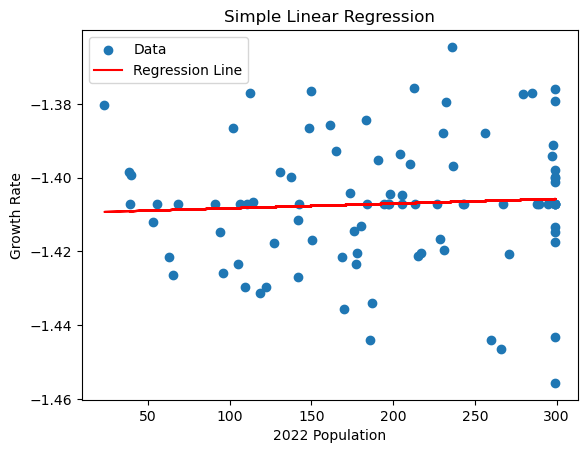

In [67]:
from sklearn.linear_model import LinearRegression
# Define the independent and dependent variables
X = world_population[['2022 Population']]
y = world_population['Growth Rate']

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Print the coefficients
print('Coefficient of determination (R^2): %.2f' % model.score(X, y))
print('Intercept: %.2f' % model.intercept_)
print('Slope: %.2f' % model.coef_)

# Plot the data and the regression line
plt.scatter(X, y, label='Data')
plt.plot(X, predictions, label='Regression Line', color='red')
plt.xlabel('2022 Population')
plt.ylabel('Growth Rate')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

Coefficient of determination (R^2): 0.00
Intercept: -1.41
Slope: 0.00


C:\Users\PetuMyles\AppData\Local\Temp\ipykernel_2896\344371917.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Slope: %.2f' % model.coef_)


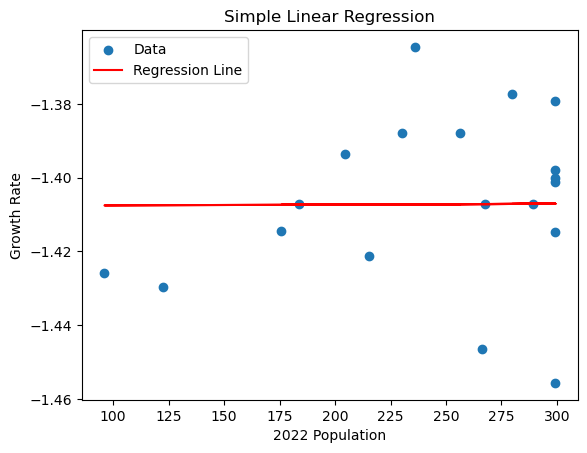

In [72]:
from sklearn.model_selection import train_test_split
# Define the independent and dependent variables
X = world_population[['2022 Population']]
y = world_population['Growth Rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
predictions = model.predict(X_test)

# Print the coefficients
print('Coefficient of determination (R^2): %.2f' % model.score(X_test, y_test))
print('Intercept: %.2f' % model.intercept_)
print('Slope: %.2f' % model.coef_)

# Plot the data and the regression line
plt.scatter(X_test, y_test, label='Data')
plt.plot(X_test, predictions, label='Regression Line', color='red')
plt.xlabel('2022 Population')
plt.ylabel('Growth Rate')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()